<a href="https://colab.research.google.com/github/tsancode/Population5/blob/miftarj-klastering/Population5/Preliminary_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt


In [2]:
orig_url2013='https://drive.google.com/file/d/11ZcRnzJOY17iu3NnHEtlRZE3MQvonDnu/view?usp=sharing'

file_id2013 = orig_url2013.split('/')[-2]
dwn_url2013='https://drive.google.com/uc?export=download&id=' + file_id2013
url2013 = requests.get(dwn_url2013).text
csv_raw2013 = StringIO(url2013)
df2013 = pd.read_csv(csv_raw2013)

In [3]:
orig_url2021='https://drive.google.com/file/d/1LasQV6oHhyVpSikPVi0Q1lJIE_nVJQMU/view?usp=sharing'

file_id2021 = orig_url2021.split('/')[-2]
dwn_url2021='https://drive.google.com/uc?export=download&id=' + file_id2021
url2021 = requests.get(dwn_url2021).text
csv_raw2021 = StringIO(url2021)
df2021 = pd.read_csv(csv_raw2021)

Exploratory

In [4]:
df2013.head()

,tahun,wilayah,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64
0,2013,JAKARTA BARATCENGKARENGCENGKARENG BARAT,6080,8751,7457,5316,8537,9495,7443,10874,10291,5856
1,2013,JAKARTA BARATCENGKARENGCENGKARENG TIMUR,7266,10558,9572,7146,11293,12407,9962,14307,12267,7164
2,2013,JAKARTA BARATCENGKARENGDURI KOSAMBI,6966,10207,9497,6922,10686,11256,8455,12153,10594,6210
3,2013,JAKARTA BARATCENGKARENGKAPUK,13214,19164,17392,13011,20499,21974,17174,24654,21172,11809
4,2013,JAKARTA BARATCENGKARENGKEDAUNG KALI ANGKE,3246,4736,4178,2951,4707,5122,4099,6055,5546,3272


In [5]:
df2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tahun    267 non-null    int64 
 1   wilayah  267 non-null    object
 2   15-19    267 non-null    int64 
 3   20-24    267 non-null    int64 
 4   25-29    267 non-null    int64 
 5   30-34    267 non-null    int64 
 6   35-39    267 non-null    int64 
 7   40-44    267 non-null    int64 
 8   45-49    267 non-null    int64 
 9   50-54    267 non-null    int64 
 10  55-59    267 non-null    int64 
 11  60-64    267 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 25.2+ KB


In [6]:
df2021.head()

,tahun,wilayah,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64
0,2021,ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANP...,310,313,329,340,344,280,208,161,118,99
1,2021,ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANP...,534,514,513,503,519,451,384,323,245,163
2,2021,ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANP...,205,207,230,196,203,217,169,175,80,54
3,2021,ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPUL...,237,243,219,244,245,192,171,146,117,74
4,2021,ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPUL...,662,625,623,560,662,504,470,371,321,252


In [7]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tahun    267 non-null    int64 
 1   wilayah  267 non-null    object
 2   15-19    267 non-null    int64 
 3   20-24    267 non-null    int64 
 4   25-29    267 non-null    int64 
 5   30-34    267 non-null    int64 
 6   35-39    267 non-null    int64 
 7   40-44    267 non-null    int64 
 8   45-49    267 non-null    int64 
 9   50-54    267 non-null    int64 
 10  55-59    267 non-null    int64 
 11  60-64    267 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 25.2+ KB


K-Means clustering.
Source: https://www.kaggle.com/code/sunixliu/mall-customer-data-analysis-and-segmentation

In [8]:
from sklearn.cluster import KMeans

K Means Data 2013

In [9]:
ds2013 = df2013.drop(df2013.columns[[0]], axis=1)

In [10]:
ds2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wilayah  267 non-null    object
 1   15-19    267 non-null    int64 
 2   20-24    267 non-null    int64 
 3   25-29    267 non-null    int64 
 4   30-34    267 non-null    int64 
 5   35-39    267 non-null    int64 
 6   40-44    267 non-null    int64 
 7   45-49    267 non-null    int64 
 8   50-54    267 non-null    int64 
 9   55-59    267 non-null    int64 
 10  60-64    267 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 23.1+ KB


In [12]:
ds2013.set_index("wilayah",inplace=True)

In [14]:
#Percobaan 4 klaster 
kmeans2013_4 = KMeans(n_clusters=4)
kmeans2013_4.fit(ds2013)

KMeans(n_clusters=4)

In [15]:
pred2013_4 = kmeans2013_4.fit_predict(ds2013)

In [17]:
ds2013_pred4 = ds2013.copy()
ds2013_pred4['Class']=pred2013_4

In [18]:
ds2013_pred4

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,Class
wilayah,,,,,,,,,,,
JAKARTA BARATCENGKARENGCENGKARENG BARAT,6080,8751,7457,5316,8537,9495,7443,10874,10291,5856,1
JAKARTA BARATCENGKARENGCENGKARENG TIMUR,7266,10558,9572,7146,11293,12407,9962,14307,12267,7164,1
JAKARTA BARATCENGKARENGDURI KOSAMBI,6966,10207,9497,6922,10686,11256,8455,12153,10594,6210,1
JAKARTA BARATCENGKARENGKAPUK,13214,19164,17392,13011,20499,21974,17174,24654,21172,11809,1
JAKARTA BARATCENGKARENGKEDAUNG KALI ANGKE,3246,4736,4178,2951,4707,5122,4099,6055,5546,3272,3
...,...,...,...,...,...,...,...,...,...,...,...
KAB.ADM.KEP.SERIBUKEP. SERIBU SLTP. TIDUNG,183,213,218,226,173,167,136,100,69,35,2
KAB.ADM.KEP.SERIBUKEP. SERIBU SLTP. UNTUNG JAWA,438,469,424,453,384,354,301,219,180,114,2
KAB.ADM.KEP.SERIBUKEP. SERIBU UTRP. HARAPAN,620,576,603,553,493,466,405,311,240,129,2


Comparing performance for diff clusters
Let's use Silhouette Coefficient to evaluate the model

In [19]:
from yellowbrick.cluster import silhouette_visualizer 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


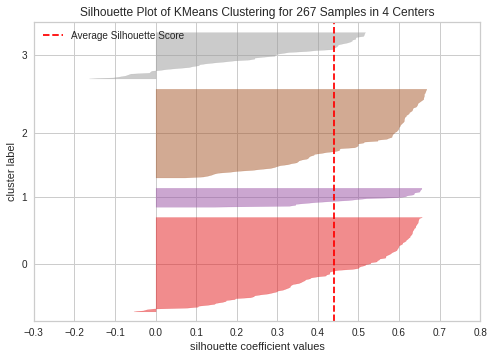

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f0a70fb50>,
                     estimator=KMeans(n_clusters=4))

In [20]:
silhouette_visualizer(kmeans2013_4, ds2013, k=(2,10)) 

Elbow chart

In [21]:
from yellowbrick.cluster.elbow import kelbow_visualizer

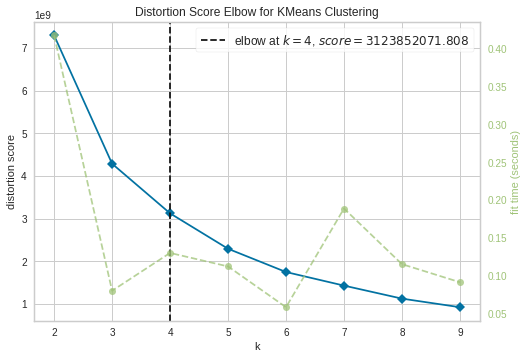

In [22]:
kv = kelbow_visualizer(kmeans2013_4, ds2013, k=(2,10))  

Berdasarkan Elbow chart, n_cluster=4 adalah yg terbaik

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_avg4 = silhouette_score(ds2013, pred2013_4)

In [25]:
print(silhouette_avg4)

0.438717794781964


In [26]:
ds2013_pred4.groupby("Class").agg([np.median,np.mean])

15-19                 20-24                 25-29               \
       median         mean   median          mean  median         mean   
Class                                                                    
0      2943.0  2976.633663   3058.0   3125.861386  3345.0  3403.356436   
1      6966.0  7105.952381  10105.0  10314.142857  9218.0  9319.619048   
2      1463.0  1327.905263   1543.0   1377.747368  1657.0  1468.431579   
3      3880.0  4187.380000   5182.5   5412.500000  5082.5  5346.880000   

        30-34                 35-39                  40-44                \
       median         mean   median          mean   median          mean   
Class                                                                      
0      3842.0  3827.881188   3742.0   3858.227723   3536.0   3637.594059   
1      6508.0  6786.142857  10195.0  10741.904762  10985.0  11765.285714   
2      1555.0  1599.736842   1937.0   1656.757895   1840.0   1594.336842   
3      3752.5  4753.360000   5938.5   5931.960000   5817.0   6080.060000   

        45-49                 50-54                  55-59                \
       median         mean   median          mean   median          mean   
Class                                                                      
0      2910.0  2953.940594   2421.0   2641.980198   1849.0   2105.534653   
1      8670.0  9205.761905  12562.0  13244.000000  11237.0  11612.714286   
2      1598.0  1376.968421   1320.0   1240.200000    977.0   1002.642105   
3      4629.5  4751.020000   6046.0   5943.820000   5495.0   5229.360000   

        60-64               
       median         mean  
Class                       
0      1257.0  1375.871287  
1      6396.0  6583.333333  
2       648.0   677.778947  
3      3245.5  3091.860000

In [27]:
ds2013_pred4['wilayah']=ds2013_pred4.index

In [29]:
hasil2013 = ds2013_pred4.groupby("Class")['wilayah'].count().reset_index()
print(hasil2013)

   Class  wilayah
0      0      101
1      1       21
2      2       95
3      3       50


In [30]:
hasil2013['persentase'] = 100 * hasil2013['wilayah']  / hasil2013['wilayah'].sum()
print(hasil2013)

   Class  wilayah  persentase
0      0      101   37.827715
1      1       21    7.865169
2      2       95   35.580524
3      3       50   18.726592


In [31]:
"""
daftar = ds2013_pred4.groupby("Class")['wilayah'].apply(list)
print(daftar[0])
print(daftar[1])
print(daftar[2])
print(daftar[3])"""

['JAKARTA BARATGROGOL PETAMBURANTANJUNG DUREN SELATAN', 'JAKARTA BARATGROGOL PETAMBURANTOMANG', 'JAKARTA BARATKEBON JERUKKELAPA DUA', 'JAKARTA BARATKEMBANGANKEMBANGAN SELATAN', 'JAKARTA BARATKEMBANGANMERUYA SELATAN', 'JAKARTA BARATPALMERAHJATI PULO', 'JAKARTA BARATPALMERAHKOTA BAMBU SELATAN', 'JAKARTA BARATPALMERAHKOTA BAMBU UTARA', 'JAKARTA BARATTAMAN SARIKEAGUNGAN', 'JAKARTA BARATTAMAN SARIKRUKUT', 'JAKARTA BARATTAMBORADURI UTARA', 'JAKARTA BARATTAMBORAJEMBATAN LIMA', 'JAKARTA BARATTAMBORAKALI ANYAR', 'JAKARTA BARATTAMBORAKERENDANG', 'JAKARTA BARATTAMBORAPEKOJAN', 'JAKARTA BARATTAMBORATANAH SEREAL', 'JAKARTA PUSATCEMPAKA PUTIHCEMPAKA PUTIH BARAT', 'JAKARTA PUSATJOHAR BARUJOHAR BARU', 'JAKARTA PUSATJOHAR BARUTANAH TINGGI', 'JAKARTA PUSATKEMAYORANCEMPAKA BARU', 'JAKARTA PUSATKEMAYORANKEBON KOSONG', 'JAKARTA PUSATKEMAYORANSERDANG', 'JAKARTA PUSATKEMAYORANUTAN PANJANG', 'JAKARTA PUSATSAWAH BESARKARANG ANYAR', 'JAKARTA PUSATSAWAH BESARMANGGA DUA SELATAN', 'JAKARTA PUSATSENENKRAMAT', 'JAKA

Dari hasil clustering, terbentuk 4 klaster, dengan rincian  38 persen kelurahan masuk ke klaster 0; 8 persen kelurahan masuk ke klaster 1; 35 persen kelurahan masuk klaster 2; 19 persen keluarahan masuk klaster 3.

K Means Data 2021

In [32]:
ds2021 = df2021.drop(df2021.columns[[0]], axis=1)

In [33]:
ds2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wilayah  267 non-null    object
 1   15-19    267 non-null    int64 
 2   20-24    267 non-null    int64 
 3   25-29    267 non-null    int64 
 4   30-34    267 non-null    int64 
 5   35-39    267 non-null    int64 
 6   40-44    267 non-null    int64 
 7   45-49    267 non-null    int64 
 8   50-54    267 non-null    int64 
 9   55-59    267 non-null    int64 
 10  60-64    267 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 23.1+ KB


In [34]:
ds2021.set_index("wilayah",inplace=True)

In [35]:

#Percobaan 4 klaster 
kmeans2021_4 = KMeans(n_clusters=4)
kmeans2021_4.fit(ds2021)

KMeans(n_clusters=4)

In [36]:
pred2021_4 = kmeans2021_4.fit_predict(ds2021)

In [37]:
ds2021_pred4 = ds2021.copy()
ds2021_pred4['Class']=pred2021_4

In [38]:
ds2021_pred4

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,Class
wilayah,,,,,,,,,,,
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU PARI,310,313,329,340,344,280,208,161,118,99,3
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU TIDUNG,534,514,513,503,519,451,384,323,245,163,3
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU UNTUNG JAWA,205,207,230,196,203,217,169,175,80,54,3
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPULAU HARAPAN,237,243,219,244,245,192,171,146,117,74,3
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPULAU KELAPA,662,625,623,560,662,504,470,371,321,252,3
...,...,...,...,...,...,...,...,...,...,...,...
JAKARTA UTARATANJUNG PRIOKSUNGAI BAMBU,3114,2976,2916,3000,3254,3169,2792,2381,1887,1323,0
JAKARTA UTARATANJUNG PRIOKSUNTER AGUNG,6789,6171,6466,6956,8095,7799,6679,5430,4586,3899,1
JAKARTA UTARATANJUNG PRIOKSUNTER JAYA,5976,5719,5938,6540,7816,7068,5584,4394,3712,3149,1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


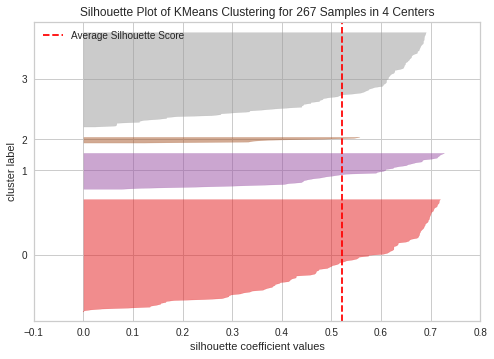

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f0c6dbc10>,
                     estimator=KMeans(n_clusters=4))

In [39]:
#Comparing performance for diff clusters Let's use Silhouette Coefficient to evaluate the model

silhouette_visualizer(kmeans2021_4, ds2021, k=(2,10)) 

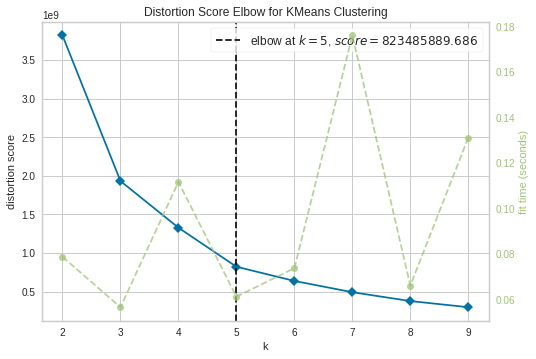

In [41]:
#Elbow chart
kv2021 = kelbow_visualizer(kmeans2021_4, ds2021, k=(2,10))  


Berdasarkan Elbow chart, n_cluster=5 adalah yg terbaik

In [42]:

#Running 5 klaster 
kmeans2021_5 = KMeans(n_clusters=5)
kmeans2021_5.fit(ds2021)

KMeans(n_clusters=5)

In [43]:
pred2021_5 = kmeans2021_5.fit_predict(ds2021)

In [44]:
ds2021_pred5 = ds2021.copy()
ds2021_pred5['Class']=pred2021_5

In [45]:
ds2021_pred5

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,Class
wilayah,,,,,,,,,,,
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU PARI,310,313,329,340,344,280,208,161,118,99,4
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU TIDUNG,534,514,513,503,519,451,384,323,245,163,4
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU SELATANPULAU UNTUNG JAWA,205,207,230,196,203,217,169,175,80,54,4
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPULAU HARAPAN,237,243,219,244,245,192,171,146,117,74,4
ADM. KEPULAUAN SERIBUKEPULAUAN SERIBU UTARAPULAU KELAPA,662,625,623,560,662,504,470,371,321,252,4
...,...,...,...,...,...,...,...,...,...,...,...
JAKARTA UTARATANJUNG PRIOKSUNGAI BAMBU,3114,2976,2916,3000,3254,3169,2792,2381,1887,1323,0
JAKARTA UTARATANJUNG PRIOKSUNTER AGUNG,6789,6171,6466,6956,8095,7799,6679,5430,4586,3899,1
JAKARTA UTARATANJUNG PRIOKSUNTER JAYA,5976,5719,5938,6540,7816,7068,5584,4394,3712,3149,1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


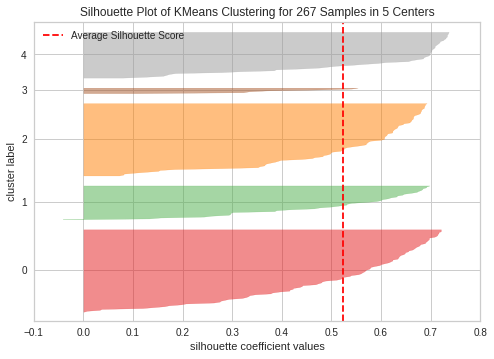

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f055cb190>,
                     estimator=KMeans(n_clusters=5))

In [46]:
#Comparing performance for diff clusters Let's use Silhouette Coefficient to evaluate the model

silhouette_visualizer(kmeans2021_5, ds2021, k=(2,10)) 

In [47]:
silhouette_avg2021_5 = silhouette_score(ds2021, pred2021_5)
print(silhouette_avg2021_5)

0.5238366291498925


In [48]:
ds2021_pred5.groupby("Class").agg([np.median,np.mean])

15-19                20-24                25-29                30-34  \
       median         mean  median         mean  median         mean  median   
Class                                                                          
0      2431.0  2392.373626  2360.0  2370.516484  2370.0  2354.021978  2371.0   
1      6132.5  6290.315789  5997.5  6085.342105  6067.0  6175.815789  6210.5   
2      3780.0  3838.812500  3710.0  3759.700000  3716.5  3774.587500  3758.5   
3      9276.0  9671.857143  8655.0  9431.285714  8772.0  9706.857143  9080.0   
4       845.0   828.490196   891.0   842.333333   861.0   845.176471   845.0   

                       35-39                  40-44                 45-49  \
               mean   median          mean   median          mean  median   
Class                                                                       
0       2368.307692   2732.0   2666.835165   2660.0   2628.010989  2357.0   
1       6324.763158   7246.5   7220.078947   7015.5   7003.605263  5976.5   
2       3829.575000   4259.0   4346.912500   4272.0   4279.900000  3747.0   
3      10089.428571  10727.0  11635.857143  10026.0  10876.857143  8601.0   
4        837.333333    960.0    942.686275    922.0    930.784314   850.0   

                     50-54                55-59                60-64  \
              mean  median         mean  median         mean  median   
Class                                                                  
0      2374.197802  2008.0  2059.846154  1613.0  1625.010989  1144.0   
1      5994.763158  4770.0  4785.578947  3614.5  3650.947368  2677.0   
2      3791.925000  3087.5  3149.262500  2415.5  2428.862500  1754.0   
3      9054.142857  6715.0  7117.857143  5125.0  5361.571429  3543.0   
4       854.117647   825.0   775.117647   666.0   655.078431   524.0   

                    
              mean  
Class               
0      1193.703297  
1      2656.763158  
2      1775.925000  
3      3764.857143  
4       513.803922

In [49]:
ds2021_pred5['wilayah']=ds2021_pred5.index

In [50]:
hasil2021 = ds2021_pred5.groupby("Class")['wilayah'].count().reset_index()
print(hasil2021)

   Class  wilayah
0      0       91
1      1       38
2      2       80
3      3        7
4      4       51


In [51]:
hasil2021['persentase'] = 100 * hasil2021['wilayah']  / hasil2021['wilayah'].sum()
print(hasil2021)

   Class  wilayah  persentase
0      0       91   34.082397
1      1       38   14.232210
2      2       80   29.962547
3      3        7    2.621723
4      4       51   19.101124


In [56]:
daftar21 = ds2021_pred5.groupby("Class")['wilayah'].apply(list)
print(daftar21[0])
print(daftar21[1])
print(daftar21[2])
print(daftar21[3])
print(daftar21[4])

['JAKARTA BARATGROGOL PETAMBURANJELAMBAR', 'JAKARTA BARATGROGOL PETAMBURANTANJUNG DUREN SELATAN', 'JAKARTA BARATGROGOL PETAMBURANTOMANG', 'JAKARTA BARATKEBON JERUKKEDOYA SELATAN', 'JAKARTA BARATKEBON JERUKKELAPA DUA', 'JAKARTA BARATKEMBANGANKEMBANGAN SELATAN', 'JAKARTA BARATPAL MERAHJATIPULO', 'JAKARTA BARATPAL MERAHKEMANGGISAN', 'JAKARTA BARATPAL MERAHKOTA BAMBU SELATAN', 'JAKARTA BARATPAL MERAHKOTA BAMBU UTARA', 'JAKARTA BARATTAMAN SARIKEAGUNGAN', 'JAKARTA BARATTAMAN SARIKRUKUT', 'JAKARTA BARATTAMBORAANGKE', 'JAKARTA BARATTAMBORADURI UTARA', 'JAKARTA BARATTAMBORAJEMBATAN BESI', 'JAKARTA BARATTAMBORAJEMBATAN LIMA', 'JAKARTA BARATTAMBORAKALI ANYAR', 'JAKARTA BARATTAMBORAKRENDANG', 'JAKARTA BARATTAMBORAPEKOJAN', 'JAKARTA BARATTAMBORATANAH SEREAL', 'JAKARTA PUSATCEMPAKA PUTIHCEMPAKA PUTIH TIMUR', 'JAKARTA PUSATCEMPAKA PUTIHRAWASARI', 'JAKARTA PUSATGAMBIRDURI PULO', 'JAKARTA PUSATGAMBIRPETOJO UTARA', 'JAKARTA PUSATJOHAR BARUGALUR', 'JAKARTA PUSATJOHAR BARUKAMPUNG RAWA', 'JAKARTA PUSATKEMA